# EXPLORATORY DATA ANALYSIS

In [9]:
# Import all required modules
import datetime as dt 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For training
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston #import the dataset loader

# For evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [10]:
# Load dasaset
boston = load_boston()

In [11]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [80]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [13]:
boston.DESCR.splitlines()

['.. _boston_dataset:',
 '',
 'Boston house prices dataset',
 '---------------------------',
 '',
 '**Data Set Characteristics:**  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial highways

In [14]:
data= pd.DataFrame(boston.data, columns=boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
# Check our dataset size 
data.shape

(506, 13)

In [16]:
# Show columns in our dataset
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [17]:
# Show info about our column data types
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [18]:
# Get more detailed information on our dataset
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [19]:
# Show sample data
data.tail(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [20]:
# Pick a random series and show its content.
data.AGE

0       65.2
1       78.9
2       61.1
3       45.8
4       54.2
5       58.7
6       66.6
7       96.1
8      100.0
9       85.9
10      94.3
11      82.9
12      39.0
13      61.8
14      84.5
15      56.5
16      29.3
17      81.7
18      36.6
19      69.5
20      98.1
21      89.2
22      91.7
23     100.0
24      94.1
25      85.7
26      90.3
27      88.8
28      94.4
29      87.3
       ...  
476     93.6
477     97.3
478     96.7
479     88.0
480     64.7
481     74.9
482     77.0
483     40.3
484     41.9
485     51.9
486     79.8
487     53.2
488     92.7
489     98.3
490     98.0
491     98.8
492     83.5
493     54.0
494     42.6
495     28.8
496     72.9
497     70.6
498     65.3
499     73.5
500     79.7
501     69.1
502     76.7
503     91.0
504     89.3
505     80.8
Name: AGE, Length: 506, dtype: float64

In [21]:
# Drop cells with null values
shaken_data = data.dropna();
shaken_data.shape

# This concludes that our dataset has no null values since it's size has not changes

(506, 13)

# Deeper analysis

### Distribution graph

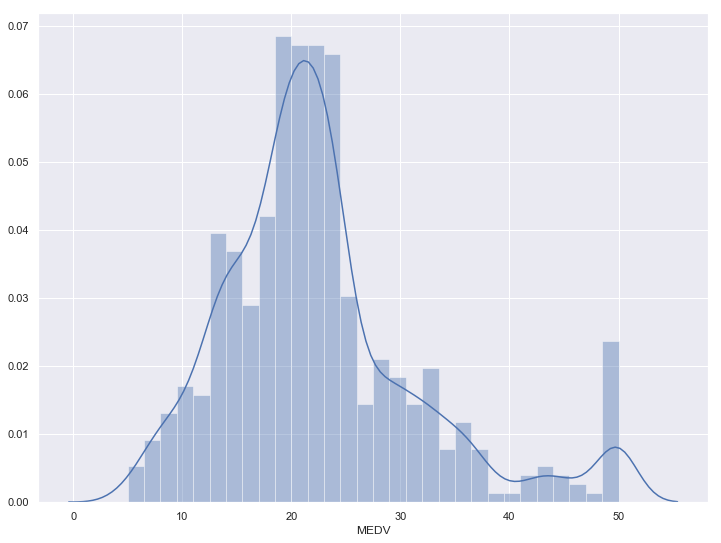

In [39]:
# Plot the distribution graph for our data. 

# Convert the array into a series first then plot the chart
data['MEDV'] = boston.target
sns.set(rc={'figure.figsize':(12,9)})
sns.distplot(data.MEDV, bins=30)
plt.show()

### Correlation matrix

In [81]:
# I plot a correlation heatmap to show how each of the columns is corelated to all other columns
# This columns with a high positive[1] (light orange - white) or negative [-1] (black) correlation will 
# greatly affect the output of our model as compared to the ones with no [0] (purple) corelation. 
# From the heatmap I see, there are more uncorrelated valuesas compared to corelated values. 
# When conducting the training I should make sure to use the corelating valies even though our
# output model may not be as accurate as required. 
correlation_matrix = data.corr().round(2)
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


#### Correlation Heatmap for easier viewing

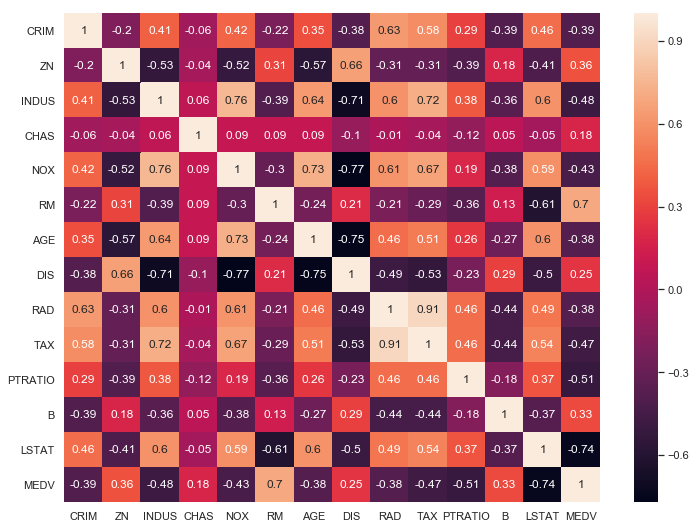

In [73]:
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True);

### Pair plots
Scatter plots to compare how a single series compares to all other columns

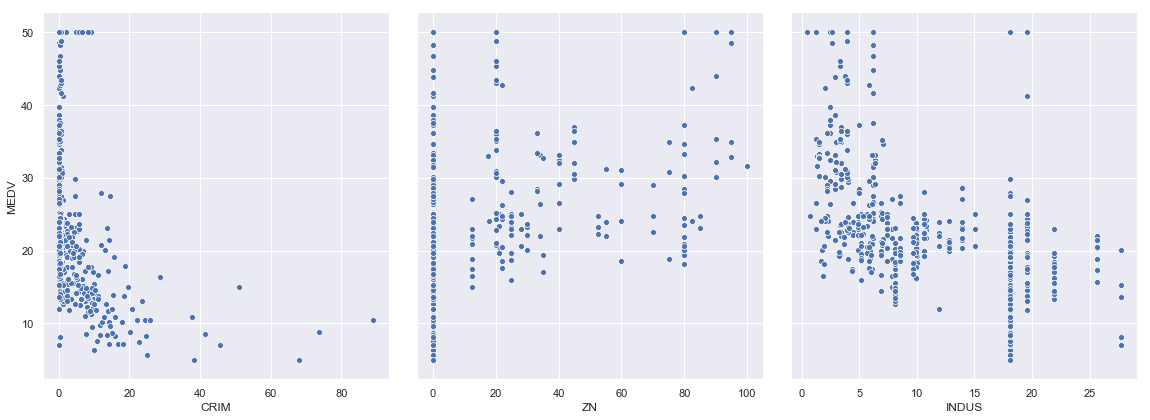

In [65]:
sns.pairplot(data,x_vars=['CRIM','ZN','INDUS'],y_vars='MEDV',height=6, aspect =0.9);

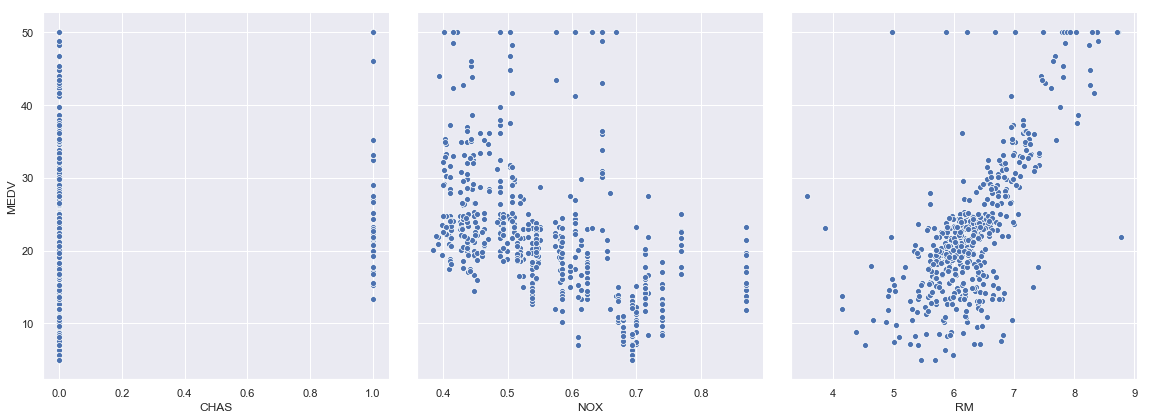

In [66]:
sns.pairplot(data,x_vars=['CHAS','NOX','RM'],y_vars='MEDV',height=6, aspect =0.9);

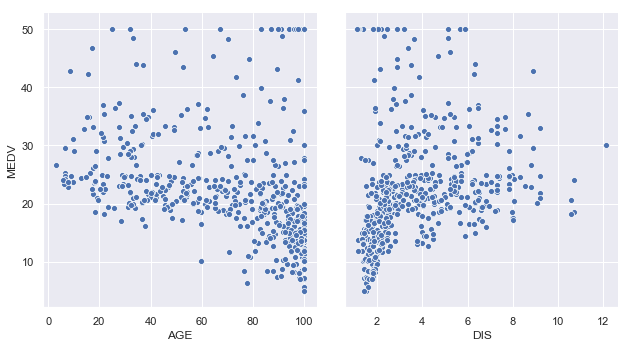

In [67]:
sns.pairplot(data,x_vars=['AGE','DIS', 'RAD'],y_vars='MEDV',height=5, aspect =0.9);

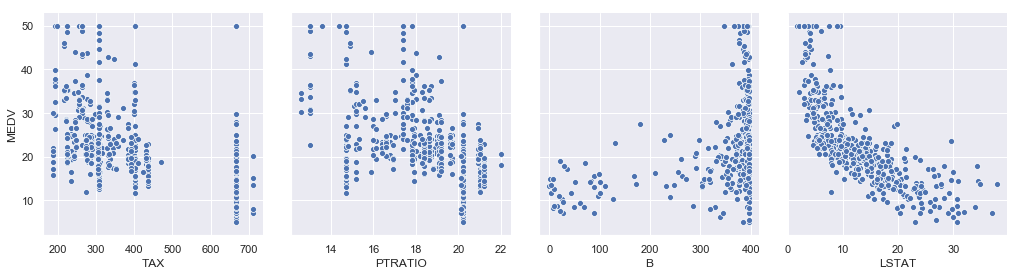

In [77]:
sns.pairplot(data,x_vars=['TAX', 'PTRATIO', 'B', 'LSTAT'],y_vars='MEDV',height=4, aspect =0.9);

# Machine Learning using regression... because why not?
After performing the EDA its only natural that I felt like I could perform some predictive analysis on columns on the dataset using regression.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54


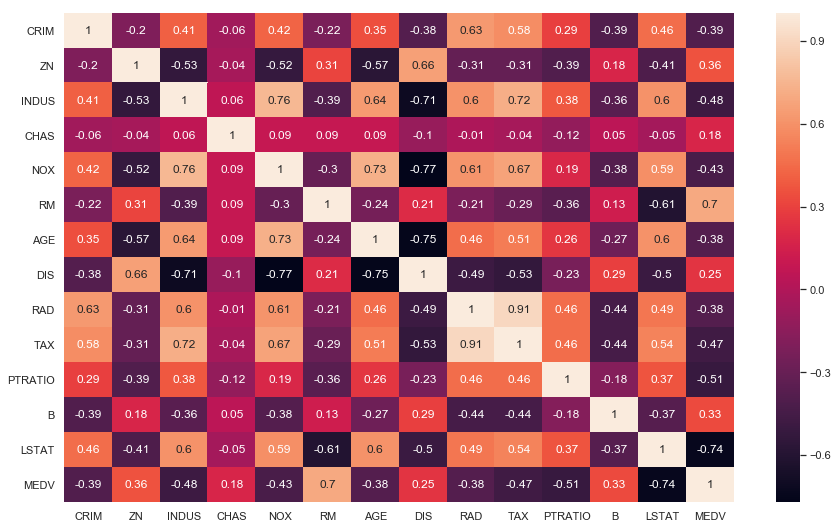

In [79]:
annot = True # to print the values inside the square
sns.set(rc={'figure.figsize':(15,9)})
sns.heatmap(data=correlation_matrix, annot=True);

In [78]:
# Create pair plots of random columns showing how they are related

def visualize(selected_features):
        for var in selected_features:
            f, ax = plt.subplots(figsize=(5, 6))
            sns.regplot(x=var, y="int_year", data=data, ax=ax)
        sns.pairplot(data, vars=selected_features)
    
# visualize(['tot_hh_monthsofobs','trx_year'])

In [48]:
# Create our regression model

def model(selected_features):
#     Define X,Y
    X = data[selected_features]
    y = data['trx_year']
    clf = linear_model.LinearRegression() # Define our linear model
    x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state=7) # Split the set into a test(30%) set and training set (70%) 
    clf.fit(x_train,y_train) # The actual training
    y_pred = clf.predict(x_test) # Prediction
    mse = mean_squared_error(y_test, y_pred)
    mae= mean_absolute_error(y_test, y_pred)
    rscore = r2_score(y_test, y_pred)
    dictionary = {"y_pred":y_pred,"mae":mae,"mse":mse,"rscore":rscore,"intercept":clf.intercept_,"coef":clf.coef_, "y_test":y_test,}
    return dictionary

Calling the above function below will throw an error because there are **NaN** fields and **strings** which have to be replaced with **int** or **floats**.

The dataset might not be the best for conducting predictive analysis using regression but it was fun to try.

In [47]:
# Will print error

model1 = model(['tot_hh_monthsofobs', 'trx_dq_round']) # Pass in a few columns

model2 = model(data.columns) # Pass the whole dataframe


evaluations = pd.DataFrame({'Model_1':  [ model1['mae'],  model1['mse'],model1['rscore'], model1['intercept']],
                        'Model_2': [ model2['mae'],  model2['mse'],model2['rscore'], model2['intercept']],
                        'Model_3': [ model3['mae'],  model3['mse'],model3['rscore'], model3['intercept']],
                       },
                          index = pd.Index(['MAE','MSE',"R-Score","Intercept"]))

print("\n",evaluations.head())

results = pd.DataFrame({'Actual':list(model1['y_test']) , 
                        'Model_1_prediction':  model1['y_pred'].flatten(),
                        'Model_2 _prediction':  model2['y_pred'].flatten()
                       })
print("\n",results.head(10))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').